In [2]:
# All utilitaries are in this module
import sys
sys.path.append('../')
from reproduction.mimno_embeddings import *

# Step 1 : Training Models

In [ ]:
make_models()

In [6]:
# Test models
data = KeyedVectors.load("../reproduction/mimno.models/fixed_order.0.wv", mmap='r')
data.most_similar(positive=['rex'], negative=["imperator"])

INFO - 15:04:39: loading Word2VecKeyedVectors object from ../reproduction/mimno.models/fixed_order.0.wv
INFO - 15:04:39: setting ignored attribute vectors_norm to None
INFO - 15:04:39: loaded ../reproduction/mimno.models/fixed_order.0.wv
INFO - 15:04:39: precomputing L2-norms of word weight vectors


[('babylon', 0.4438272714614868),
 ('iacobes', 0.4324181079864502),
 ('regnvm', 0.42979398369789124),
 ('hystaspes', 0.419981986284256),
 ('israhelis', 0.4162275195121765),
 ('regno', 0.40032055974006653),
 ('achabes', 0.3985532522201538),
 ('iacobs', 0.39838138222694397),
 ('assyrii', 0.39688119292259216),
 ('cedar', 0.39685842394828796)]

# Step 2: Topic Modelling

In [7]:
mallet = Mallet()
print(list(mallet.topics()))

[['hostis', 'castra', 'dies', 'capio', 'vrbs', 'miles', 'inde', 'locvs', 'agmen', 'signvm', 'qvadranta', 'exercitvs', 'eqves', 'animvs', 'mille', 'vis', 'romanvs', 'fvga', 'spes', 'dvx'], ['mentior', 'mendacivm', 'veritas', 'ivro', 'falsvs', 'fallo', 'pvto', 'animvs', 'cor', 'testimonivm', 'nvllvs', 'cavsa', 'salvs', 'simvlo', 'pavlvs', 'invenio', 'simvlatio', 'peccatvm', 'svscipio', 'recte'], ['devs', 'terra', 'creo', 'caelvm', 'dies', 'aqva', 'lvx', 'tempvs', 'factvm', 'opvs', 'mvndvs', 'verbvm', 'principivm', 'tenebrae', 'iste', 'scriptvra', 'formo', 'imago', 'lignvm', 'intelligo'], ['qvidam', 'itaqve', 'vnde', 'gratia', 'natvra', 'qvasi', 'divinvs', 'pvto', 'aqva', 'aestimo', 'vsvs', 'svpra', 'species', 'velvt', 'mvlier', 'mvnvs', 'licet', 'pleriqve', 'cito', 'plervmqve'], ['locvs', 'primvs', 'qvod', 'pono', 'sine', 'propter', 'genvs', 'totvs', 'nascor', 'cavsa', 'modvs', 'seqvor', 'itaqve', 'appello', 'vterqve', 'qvidam', 'tres', 'pervenio', 'secvndvs', 'reliqvvs'], ['vestis', 'pv

# Step 3: Select random words

To have a fair representation, we should select words that appears at in different *deciles* of the corpus.

# Step 4 : Compute stability

In [21]:
word2vec_model = KeyedVectors.load("../reproduction/mimno.models/fixed_order.0.wv", mmap='r')

INFO - 15:22:17: loading Word2VecKeyedVectors object from ../reproduction/mimno.models/fixed_order.0.wv
INFO - 15:22:17: setting ignored attribute vectors_norm to None
INFO - 15:22:17: loaded ../reproduction/mimno.models/fixed_order.0.wv


In [48]:
import itertools

# Data structure
# Dictionary : level 1 is topic
# Dictionary : level 2 is word 1
# Dictionary : level 3 is word 2 

def word2vec_similarities(word1: str, word2: str, models: List[KeyedVectors]) -> List[float]:
    """ Given word1  and word 2, returns the distance between these word 
    if they appear in the models
    """
    x = []
    for model in models:
        if word1 in model and word2 in model:
            x.append(model.n_similarity([word1], [word2]))
    return x

def build_proximity(topics, models):
    """ Build a proximity dictionary for the topics given where each word combination
    in a topic are scored in proximity against each other
    """
    structure = {
        # Topic
       # topic_index: {
            word1: {
                # List of scores over one model
                word2: []
                for word2 in words if word2 != word1
            }
            for words in topics
            for word1 in words
        }
    #    for topic_index, words in enumerate(topics)
    #}
    for word1 in structure:
        for word2 in structure[word1]:
            structure[word1][word2] = word2vec_similarities(word1, word2, models=models)
    return structure

def get_models(order="fixed_order", glob_pattern="../reproduction/mimno.models/{order}.*.wv"):
    """ Get all models in {order} arrangement
    """
    if len(glob.glob(glob_pattern.format(order=order))) ==0:
        raise Exception("No models found")
    for model in glob.glob(glob_pattern.format(order=order)):
        yield KeyedVectors.load(model)
    
proximity_dict = build_proximity(mallet.topics(), list(get_models()))

INFO - 15:43:52: loading Word2VecKeyedVectors object from ../reproduction/mimno.models/fixed_order.31.wv
INFO - 15:43:52: setting ignored attribute vectors_norm to None
INFO - 15:43:52: loaded ../reproduction/mimno.models/fixed_order.31.wv
INFO - 15:43:52: loading Word2VecKeyedVectors object from ../reproduction/mimno.models/fixed_order.44.wv
INFO - 15:43:52: setting ignored attribute vectors_norm to None
INFO - 15:43:52: loaded ../reproduction/mimno.models/fixed_order.44.wv
INFO - 15:43:52: loading Word2VecKeyedVectors object from ../reproduction/mimno.models/fixed_order.20.wv
INFO - 15:43:52: setting ignored attribute vectors_norm to None
INFO - 15:43:52: loaded ../reproduction/mimno.models/fixed_order.20.wv
INFO - 15:43:52: loading Word2VecKeyedVectors object from ../reproduction/mimno.models/fixed_order.15.wv
INFO - 15:43:52: setting ignored attribute vectors_norm to None
INFO - 15:43:52: loaded ../reproduction/mimno.models/fixed_order.15.wv
INFO - 15:43:52: loading Word2VecKeyedVe

INFO - 15:43:56: setting ignored attribute vectors_norm to None
INFO - 15:43:56: loaded ../reproduction/mimno.models/fixed_order.30.wv
INFO - 15:43:56: loading Word2VecKeyedVectors object from ../reproduction/mimno.models/fixed_order.8.wv
INFO - 15:43:56: setting ignored attribute vectors_norm to None
INFO - 15:43:56: loaded ../reproduction/mimno.models/fixed_order.8.wv
INFO - 15:43:56: loading Word2VecKeyedVectors object from ../reproduction/mimno.models/fixed_order.2.wv
INFO - 15:43:56: setting ignored attribute vectors_norm to None
INFO - 15:43:56: loaded ../reproduction/mimno.models/fixed_order.2.wv
INFO - 15:43:56: loading Word2VecKeyedVectors object from ../reproduction/mimno.models/fixed_order.38.wv
INFO - 15:43:56: setting ignored attribute vectors_norm to None
INFO - 15:43:56: loaded ../reproduction/mimno.models/fixed_order.38.wv
INFO - 15:43:56: loading Word2VecKeyedVectors object from ../reproduction/mimno.models/fixed_order.45.wv
INFO - 15:43:56: setting ignored attribute v

In [ ]:
# For debug purposes
import json
with open("fixed_order.json", "w") as f:
    json.dump({
        w1: {
            w2: [float(score) for score in proximity_dict[w1][w2]]
            for w2 in proximity_dict[w1]
        }   
        for w1 in proximity_dict
    }, f)

# Step 5 : Plot stability

In [4]:
import collections
import numpy as np 
import json

with open("fixed_order.json") as f:
    proximity_dict = json.load(f)


def read_corpus(path=fixed_order()):
    """ Read the corpus """
    for file in path:
        with open(file) as f:
            yield from f.read().split()

distribution = collections.Counter(read_corpus())
total_words = sum(distribution.values())


In [5]:
std_devs = {
    w1: {
        w2: np.std(proximity_dict[w1][w2])
        for w2 in proximity_dict[w1]
    }   
    for w1 in proximity_dict
}

/home/thibault/dev/these/these_env/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/thibault/dev/these/these_env/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/thibault/dev/these/these_env/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [10]:
%matplotlib inline

import seaborn as sns
import pandas as pd

# Load the iris dataset
fixed_order_serie = pd.DataFrame([
        (
            stddev,
            distribution[w1]/total_words,
            distribution[w2]/total_words
        )
        for w1 in std_devs
        for w2, stddev in std_devs[w1].items()
    ],
    columns=['std_dev', 'w1_distrib', 'w2_distrib']
)


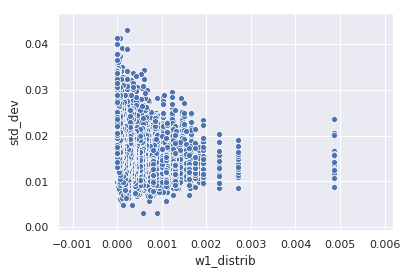

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.scatterplot(x="w1_distrib", y="std_dev", data=fixed_order_serie)

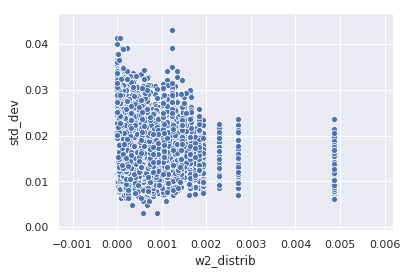

In [18]:
g = sns.scatterplot(x="w2_distrib", y="std_dev", data=fixed_order_serie)